In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
contacts_df = pd.read_csv("ache_donepezil_contacts.csv")
contacts_df.head(15)

,resname,resid,chain
0,ARG,289,A
1,GLU,199,A
2,GLY,117,A
3,GLY,118,A
4,GLY,123,A
5,HIS,440,A
6,ILE,287,A
7,LEU,127,A
8,PHE,288,A
9,PHE,330,A


In [17]:
unique_residues = contacts_df.drop_duplicates(
    subset=["resname", "resid", "chain"]
)

unique_residues

,resname,resid,chain
0,ARG,289,A
1,GLU,199,A
2,GLY,117,A
3,GLY,118,A
4,GLY,123,A
5,HIS,440,A
6,ILE,287,A
7,LEU,127,A
8,PHE,288,A
9,PHE,330,A


In [18]:
contact_counts = (
    contacts_df
    .groupby(["resname", "resid", "chain"])
    .size()
    .reset_index(name="atomic_contact_count")
    .sort_values("atomic_contact_count", ascending=False)
)

contact_counts.head(15)

,resname,resid,chain,atomic_contact_count
0,ARG,289,A,1
1,GLU,199,A,1
2,GLY,117,A,1
3,GLY,118,A,1
4,GLY,123,A,1
5,HIS,440,A,1
6,ILE,287,A,1
7,LEU,127,A,1
8,PHE,288,A,1
9,PHE,330,A,1


In [19]:
top15_residues = contact_counts.head(15)
top15_residues

,resname,resid,chain,atomic_contact_count
0,ARG,289,A,1
1,GLU,199,A,1
2,GLY,117,A,1
3,GLY,118,A,1
4,GLY,123,A,1
5,HIS,440,A,1
6,ILE,287,A,1
7,LEU,127,A,1
8,PHE,288,A,1
9,PHE,330,A,1


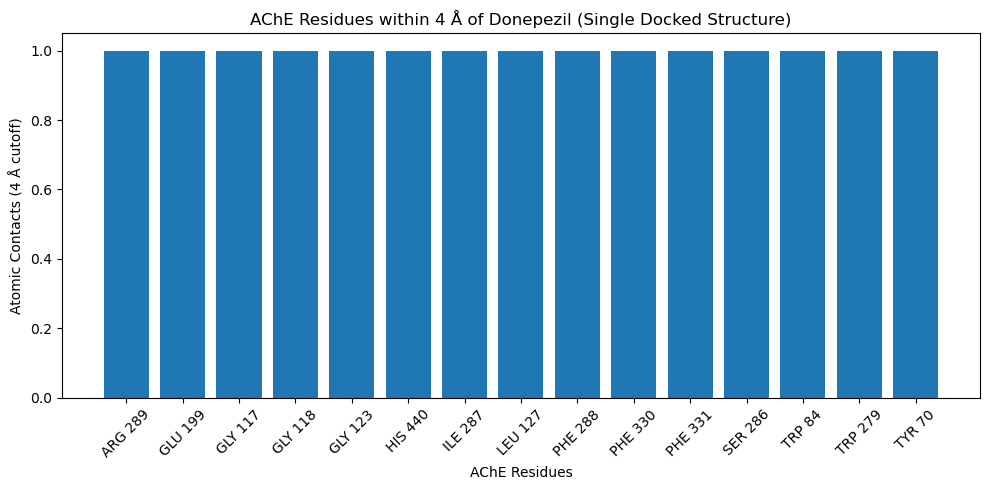

In [21]:
plt.figure(figsize=(10, 5))

labels = (
    top15_residues["resname"]
    + " "
    + top15_residues["resid"].astype(str)
)

plt.bar(
    labels,
    top15_residues["atomic_contact_count"]
)

plt.xticks(rotation=45)
plt.ylabel("Atomic Contacts (4 Å cutoff)")
plt.xlabel("AChE Residues")
plt.title("AChE Residues within 4 Å of Donepezil (Single Docked Structure)")
plt.tight_layout()
plt.show()

In [22]:
top15_residues.to_csv(
    "top15_ache_donepezil_atomic_contacts.csv",
    index=False
)